# Data analysis of Superstore Sales Dataset
### Feature Engineering

To enhance analysis and derive deeper insights, I engineered the following new features from the raw dataset:

- **Year**: Extracted from `order_date` to study yearly trends.
- **Month**: Extracted numerical month from `order_date`.
- **Month_Name**: Derived full month name using SQL's `DATE_FORMAT()` for better readability in visualizations.
- **Quarter**: Extracted using SQL's `QUARTER()` function to observe quarterly performance.
- **Day**: Extracted day of the month for potential micro-level insights.
- **Weekday**: Created to analyze performance based on the day of the week.
- **Top 10 Products / States**: Identified top contributors using `GROUP BY` and `ORDER BY`.

These engineered features helped me create powerful visualizations and uncover seasonal, regional, and product-level patterns.

# Upload dataset to MySQL

In [1]:
!pip install mysql-connector-python

   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ----------------- ---------------------- 7.1/16.4 MB 38.5 MB/s eta 0:00:01
   ---------------------------------------  16.3/16.4 MB 40.9 MB/s eta 0:00:01
   ---------------------------------------- 16.4/16.4 MB 37.2 MB/s eta 0:00:00


In [42]:
import mysql.connector
import pandas as pd

In [66]:
#Read CSV file
sales = pd.read_csv("E:\Superstore_Sales_Dataset\clean_sales_data.csv")

#Change data types accordingly and deal with null values
sales['postal_code'] = sales['postal_code'].astype(str)
sales['postal_code'] = sales['postal_code'].replace('nan', 'Unknown')

sales['order_date'] = pd.to_datetime(sales['order_date'])
sales['ship_date'] = pd.to_datetime(sales['ship_date'])


In [67]:
sales.isnull().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
dtype: int64

In [68]:
sales.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code              object
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
dtype: object

In [1]:
#To upload to MYSQL
!pip install SQLAlchemy


In [69]:
from sqlalchemy import create_engine

In [70]:
#Upload cmd to MySQL
sales.to_sql(
    name='clean_sales_data',
    con=engine,
    if_exists='replace',
    index=False,
    chunksize=1000  # Upload 1000 rows at a time
)


9800

In [71]:
#Check results
query = "select * from clean_sales_data;"
sales = pd.read_sql(query, engine)
sales

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


# Exploratory Data Analysis

## Data Overview

In [73]:
sales.shape

(9800, 18)

### 9800 rows and 18 columns

In [72]:
sales.describe()

,row_id,order_date,ship_date,sales
count,9800.000000,9800,9800,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,230.769059
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,0.444000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,17.248000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,54.490000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,210.605000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,22638.480000
std,2829.160653,NaN,NaN,626.651875


In [74]:
sales.isnull().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
dtype: int64

In [78]:
sales.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code              object
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
dtype: object

In [77]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9800 non-null   int64         
 1   order_id       9800 non-null   object        
 2   order_date     9800 non-null   datetime64[ns]
 3   ship_date      9800 non-null   datetime64[ns]
 4   ship_mode      9800 non-null   object        
 5   customer_id    9800 non-null   object        
 6   customer_name  9800 non-null   object        
 7   segment        9800 non-null   object        
 8   country        9800 non-null   object        
 9   city           9800 non-null   object        
 10  state          9800 non-null   object        
 11  postal_code    9800 non-null   object        
 12  region         9800 non-null   object        
 13  product_id     9800 non-null   object        
 14  category       9800 non-null   object        
 15  sub_category   9800 n

## Univariate Analysis

In [79]:
#Unique values in each column
sales.nunique()

row_id           9800
order_id         4922
order_date       1230
ship_date        1326
ship_mode           4
customer_id       793
customer_name     793
segment             3
country             1
city              529
state              49
postal_code       627
region              4
product_id       1861
category            3
sub_category       17
product_name     1849
sales            5757
dtype: int64

In [80]:
sales.ship_mode.unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [81]:
sales.segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [82]:
sales.region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [83]:
sales.category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [85]:
sales.sub_category.unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

## Unique rows per column
- country = 1 - United States
- states = 49 states of US
- ship mode = 4 ['Second Class', 'Standard Class', 'First Class', 'Same Day']
- segment = 3 ['Consumer', 'Corporate', 'Home Office']
- region = 4 ['South', 'West', 'Central', 'East']
- product_id = 1861 = many unique products
- categories = 3 ['Furniture', 'Office Supplies', 'Technology']
- subcategories = 17 types



In [86]:
sales.segment.value_counts()

segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

#### Consumer segment forms majority of data

In [87]:
sales.category.value_counts()

category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

#### Office suplies are in demand

In [90]:
#Top 10 most frequent products
sales.product_name.value_counts().head(10)

product_name
Staple envelope                               47
Staples                                       46
Easy-staple paper                             44
Avery Non-Stick Binders                       20
Staples in misc. colors                       18
Staple remover                                18
Storex Dura Pro Binders                       17
KI Adjustable-Height Table                    17
Staple-based wall hangings                    16
Situations Contoured Folding Chairs, 4/Set    15
Name: count, dtype: int64

In [91]:
sales.sub_category.value_counts()

sub_category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

#### Binders, Paper, Furnishings are most frequently ordered whereas Machines and Copiers are least in demand

In [92]:
sales.state.value_counts()

state
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 41
Nevada  

#### California has the highest orders followed by New York and Wyoming has only 1 order.

In [93]:
sales.sales.describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: sales, dtype: float64

#### Standard deviation indicates high variation in sales. Average sale is 230.77. Max sale is 22638.48 which is very high and definitely a strong outlier

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

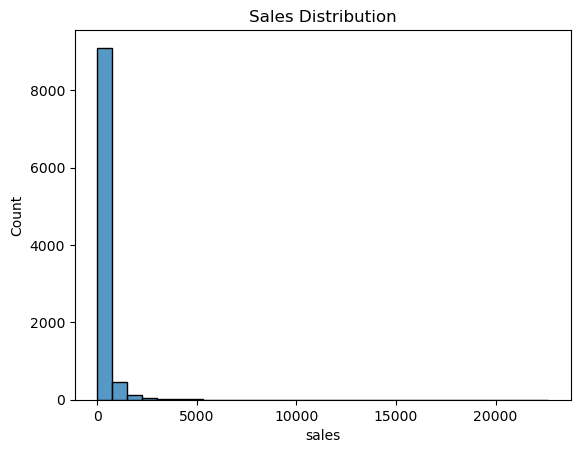

In [103]:
#Visualization for sales column
sns.histplot(data = sales, x = 'sales', bins = 30)
plt.title("Sales Distribution")
plt.show()

#### Very few orders had large sales (around 5000) and most of the sales are of small amount like 500 or 1000

## Bivariate Analysis

In [134]:
#Which segment has the highest sales?
query = """
SELECT segment,
       ROUND(SUM(sales), 2) AS total_sales
FROM CLEAN_SALES_DATA
GROUP BY SEGMENT
ORDER BY total_sales DESC;
"""

segment = pd.read_sql(query, engine)
display(segment)


,segment,total_sales
0,Consumer,1148060.53
1,Corporate,688494.07
2,Home Office,424982.18


In [147]:
#Which category has the highest sales?
query = """
SELECT CATEGORY, ROUND(SUM(SALES), 2) AS TOTAL_SALES
FROM CLEAN_SALES_DATA
GROUP BY CATEGORY
ORDER BY TOTAL_SALES DESC;
"""

category = pd.read_sql(query, engine)
display(category)

,CATEGORY,TOTAL_SALES
0,Technology,827455.87
1,Furniture,728658.58
2,Office Supplies,705422.33


In [122]:
#Which sub_category has the highest sales?
query = """
SELECT SUB_CATEGORY, ROUND(SUM(SALES), 2) AS TOTAL_SALES
FROM CLEAN_SALES_DATA
GROUP BY SUB_CATEGORY
ORDER BY TOTAL_SALES DESC;
"""

sub_category = pd.read_sql(query,engine)
display(sub_category)

,SUB_CATEGORY,TOTAL_SALES
0,Phones,327782.45
1,Chairs,322822.73
2,Storage,219343.39
3,Tables,202810.63
4,Binders,200028.79
5,Machines,189238.63
6,Accessories,164186.70
7,Copiers,146248.09
8,Bookcases,113813.20
9,Appliances,104618.40


In [123]:
#Which region makes the highest sales?
query = """
SELECT REGION, ROUND(SUM(SALES), 2) AS TOTAL_SALES
FROM CLEAN_SALES_DATA
GROUP BY REGION
ORDER BY TOTAL_SALES DESC;
"""

region = pd.read_sql(query, engine)
display(region)

,REGION,TOTAL_SALES
0,West,710219.68
1,East,669518.73
2,Central,492646.91
3,South,389151.46


In [124]:
#Which ship mode is most preffered?
query = """
SELECT SHIP_MODE, ROUND(SUM(SALES), 2) AS TOTAL_SALES
FROM CLEAN_SALES_DATA
GROUP BY SHIP_MODE
ORDER BY TOTAL_SALES DESC;
"""

ship = pd.read_sql(query, engine)
display(ship)

,SHIP_MODE,TOTAL_SALES
0,Standard Class,1340831.31
1,Second Class,449914.18
2,First Class,345572.26
3,Same Day,125219.04


In [126]:
#Which top 10 states makes the highest sales?
query = """
SELECT STATE, ROUND(SUM(SALES), 2) AS TOTAL_SALES
FROM CLEAN_SALES_DATA
GROUP BY STATE
ORDER BY TOTAL_SALES DESC
LIMIT 10;
"""

state = pd.read_sql(query, engine)
display(state)

,STATE,TOTAL_SALES
0,California,446306.46
1,New York,306361.15
2,Texas,168572.53
3,Washington,135206.85
4,Pennsylvania,116276.65
5,Florida,88436.53
6,Illinois,79236.52
7,Michigan,76136.07
8,Ohio,75130.35
9,Virginia,70636.72


### Bivariate analysis summary
- Most revenue comes from Consumers(1.14M)
- Technology(827K) is the top-selling category
- Phones(328K) are the top-selling sub_category
- West region(710K) drives the most sales
- Most orders are shipped via standard class(1.3M)
- Large population states have more sales - California(446K), New York(306K), Texas(169K)

## Plot Visualizations for all Bivariate Analysis

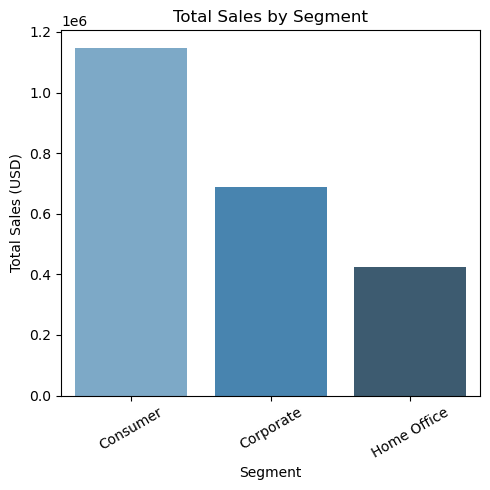

In [175]:
plt.figure(figsize=(5, 5))
sns.barplot(x='segment', y='total_sales', data=segment, hue='segment', palette='Blues_d', legend=False)
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation = 30)
plt.tight_layout()
plt.show()


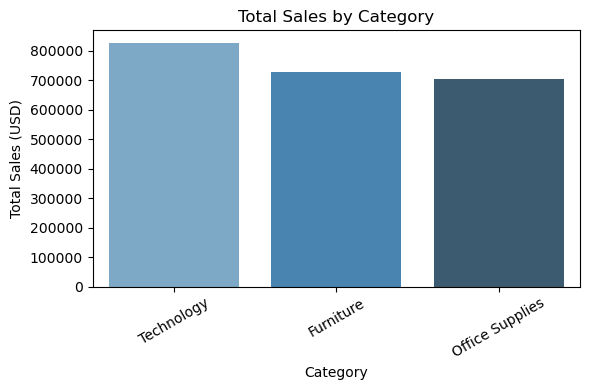

In [174]:
plt.figure(figsize=(6, 4))
sns.barplot(x='CATEGORY', y='TOTAL_SALES', data= category, hue='CATEGORY', palette='Blues_d', legend=False)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

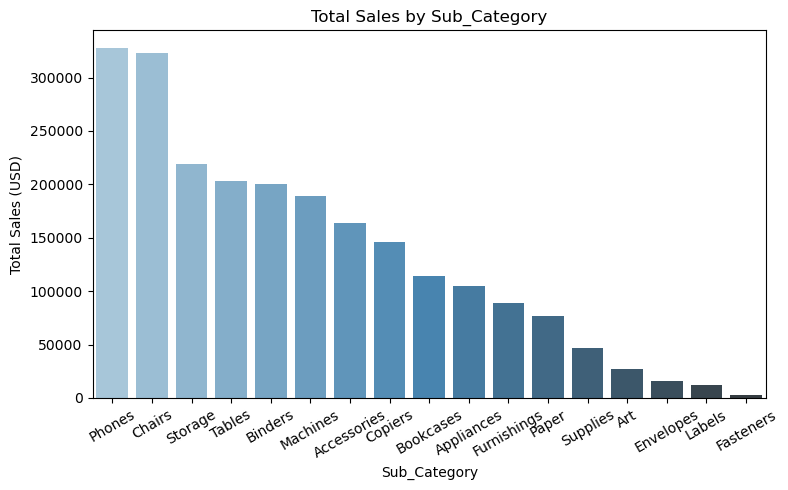

In [160]:
plt.figure(figsize=(8, 5))
sns.barplot(x='SUB_CATEGORY', y='TOTAL_SALES', data= sub_category, hue='SUB_CATEGORY', palette='Blues_d', legend=False)
plt.title('Total Sales by Sub_Category')
plt.xlabel('Sub_Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

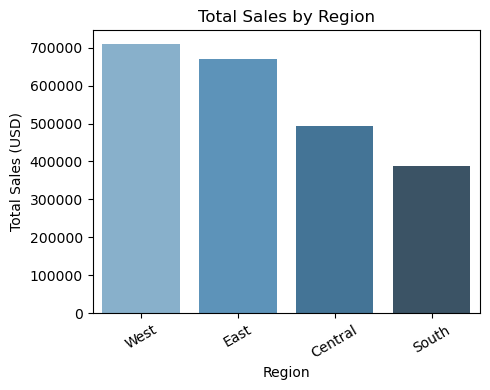

In [169]:
plt.figure(figsize=(5, 4))
sns.barplot(x='REGION', y='TOTAL_SALES', data= region, hue='REGION', palette='Blues_d', legend=False)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

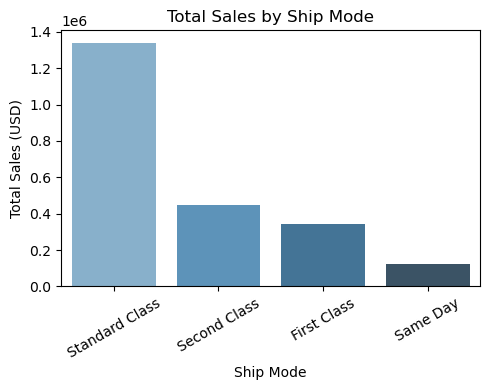

In [170]:
plt.figure(figsize=(5, 4))
sns.barplot(x='SHIP_MODE', y='TOTAL_SALES', data= ship, hue='SHIP_MODE', palette='Blues_d', legend=False)
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

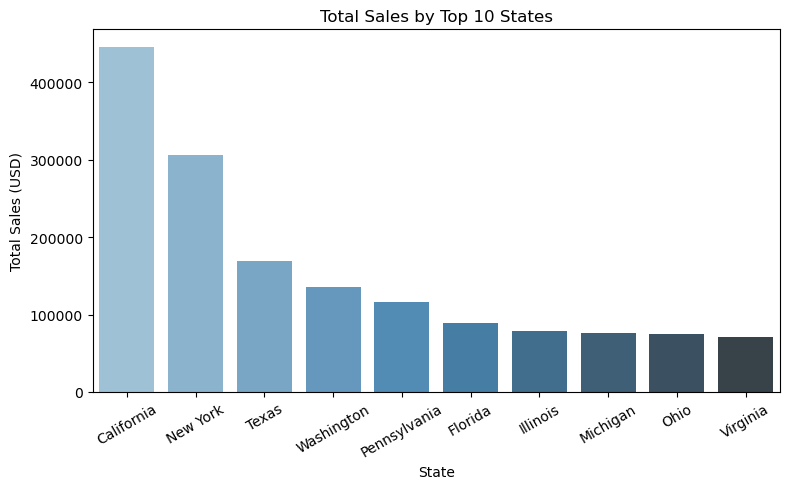

In [173]:
plt.figure(figsize=(8, 5))
sns.barplot(x='STATE', y='TOTAL_SALES', data= state, hue='STATE', palette='Blues_d', legend=False)
plt.title('Total Sales by Top 10 States')
plt.xlabel('State')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Time-Based Sales Trends

In [183]:
#Feature Engineering
#Extracting day, year, month, quarter, weekdays
query = """
SELECT 
  YEAR(order_date) AS Year,
  MONTH(order_date) AS Month,
  DATE_FORMAT(order_date, '%M') AS Month_Name,
  QUARTER(order_date) AS Quarter,
  DAY(order_date) AS Day,
  DATE_FORMAT(order_date, '%W') AS Weekday
FROM clean_sales_data;
"""

date = pd.read_sql(query, engine)
display(date)

,Year,Month,Month_Name,Quarter,Day,Weekday
0,2017,11,November,4,8,Wednesday
1,2017,11,November,4,8,Wednesday
2,2017,6,June,2,12,Monday
3,2016,10,October,4,11,Tuesday
4,2016,10,October,4,11,Tuesday
...,...,...,...,...,...,...
9795,2017,5,May,2,21,Sunday
9796,2016,1,January,1,12,Tuesday
9797,2016,1,January,1,12,Tuesday
9798,2016,1,January,1,12,Tuesday


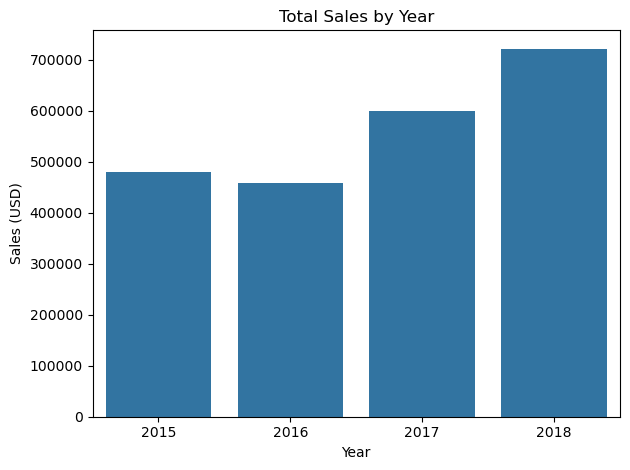

In [184]:
query = """
SELECT YEAR(order_date) AS Year, SUM(sales) AS Total_Sales
FROM clean_sales_data
GROUP BY Year
ORDER BY Year;
"""

sales_yearly = pd.read_sql(query, engine)
sns.barplot(x='Year', y='Total_Sales', data=sales_yearly)
plt.title("Total Sales by Year")
plt.ylabel("Sales (USD)")
plt.tight_layout()
plt.show()


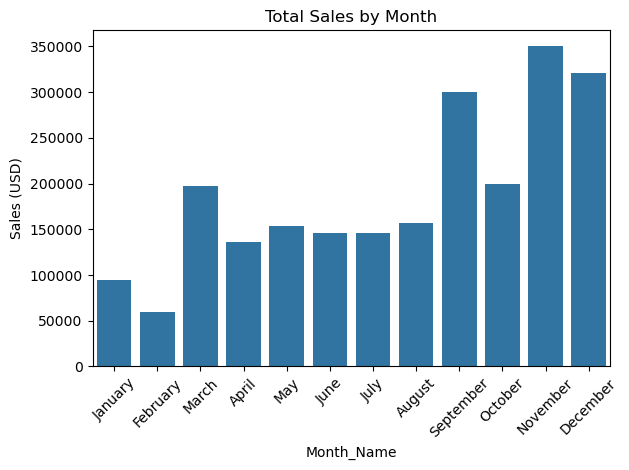

In [185]:
query = """
SELECT MONTH(order_date) AS Month, DATE_FORMAT(order_date, '%M') AS Month_Name, 
       SUM(sales) AS Total_Sales
FROM clean_sales_data
GROUP BY Month, Month_Name
ORDER BY Month;
"""

df_monthly = pd.read_sql(query, engine)
sns.barplot(x='Month_Name', y='Total_Sales', data=df_monthly)
plt.title("Total Sales by Month")
plt.xticks(rotation=45)
plt.ylabel("Sales (USD)")
plt.tight_layout()
plt.show()


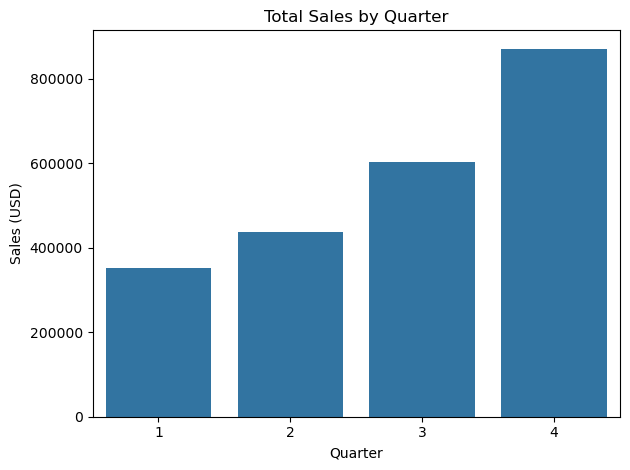

In [186]:
query = """
SELECT QUARTER(order_date) AS Quarter, SUM(sales) AS Total_Sales
FROM clean_sales_data
GROUP BY Quarter
ORDER BY Quarter;
"""

df_quarterly = pd.read_sql(query, engine)
sns.barplot(x='Quarter', y='Total_Sales', data=df_quarterly)
plt.title("Total Sales by Quarter")
plt.ylabel("Sales (USD)")
plt.tight_layout()
plt.show()


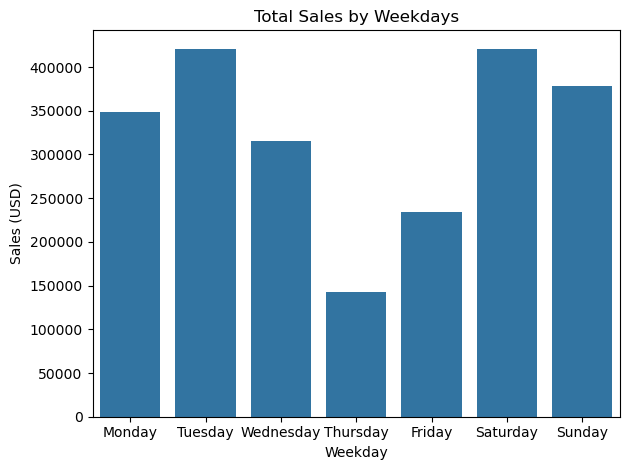

In [192]:
query = """
SELECT DATE_FORMAT(order_date, '%W') AS Weekday, SUM(sales) AS Total_Sales
FROM clean_sales_data
GROUP BY Weekday
ORDER BY FIELD(Weekday, 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday');
"""

df_weekdays = pd.read_sql(query, engine)
sns.barplot(x='Weekday', y='Total_Sales', data=df_weekdays)
plt.title("Total Sales by Weekdays")
plt.ylabel("Sales (USD)")
plt.tight_layout()
plt.show()


In [193]:
query = """
SELECT DAY(order_date) AS order_day,
    COUNT(*) AS order_count,
    SUM(Sales) AS total_sales
FROM clean_sales_data
GROUP BY order_day
ORDER BY order_day;
"""

day = pd.read_sql(query, engine)
display(day)


,order_day,order_count,total_sales
0,1,329,90957.9824
1,2,370,103951.1600
2,3,357,71788.6906
3,4,305,65094.9490
4,5,362,64277.0788
5,6,270,51099.1360
6,7,294,62393.9465
7,8,348,100560.3526
8,9,344,66582.3650
9,10,295,62563.7830


C:\Users\meghu\AppData\Local\Temp\ipykernel_13856\865314183.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day, x='order_day', y='total_sales', palette='viridis')


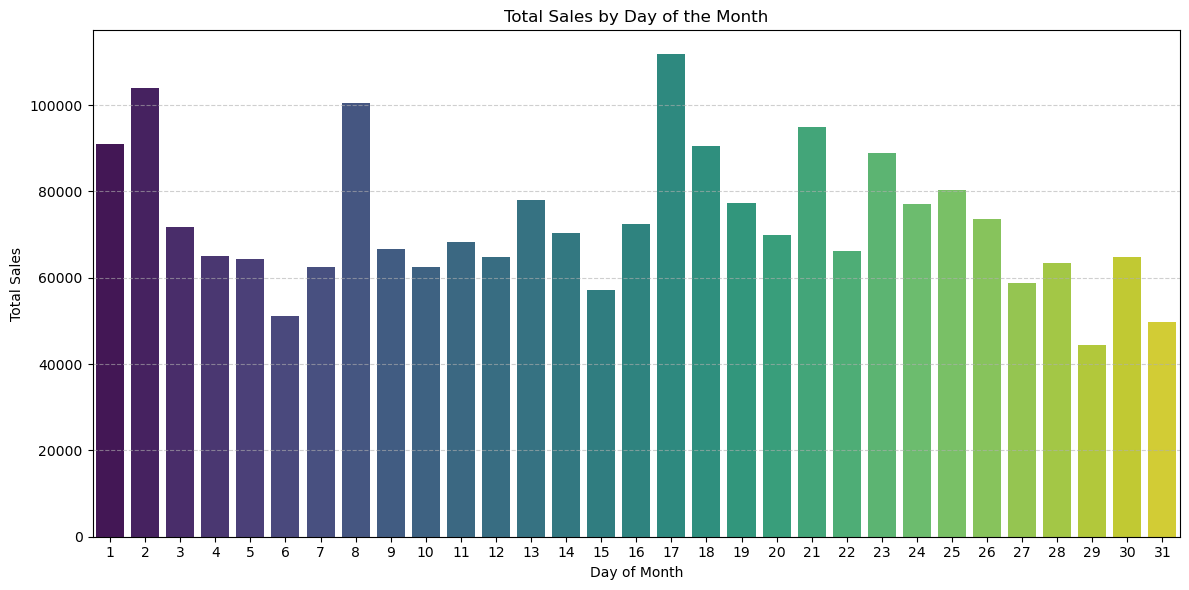

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=day, x='order_day', y='total_sales', palette='viridis')
plt.title('Total Sales by Day of the Month')
plt.xlabel('Day of Month')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Time-Based Sales Trends Summary

- Sales has been gradually increasing year by year from 2015(490K) to 2018(720K)
- November and December are the peak months(300K - 350K), might be due to the holiday season - Black Friday and Christmas Promotions
- Q4(900K) is the peak quarter likely due to year-end holidays
- Tuesday and Saturday saw the highest sales, both over 420K USD, while Thursday had the lowest (~140K USD). Sales tend to peak on weekends and early weekdays, with a noticeable midweek dip.
- Sales appear relatively higher on the 2nd, 8th, and 17th of each month, with a few dips around the end of the month.